In [282]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
from scipy import signal
import soundfile as sf

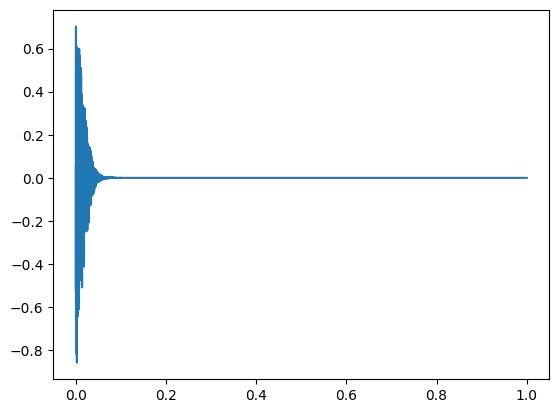

In [283]:

path = 'pluc.wav'
pluc_window = 40
audio, sample_rate = librosa.load(path)
audio = librosa.effects.percussive(audio)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

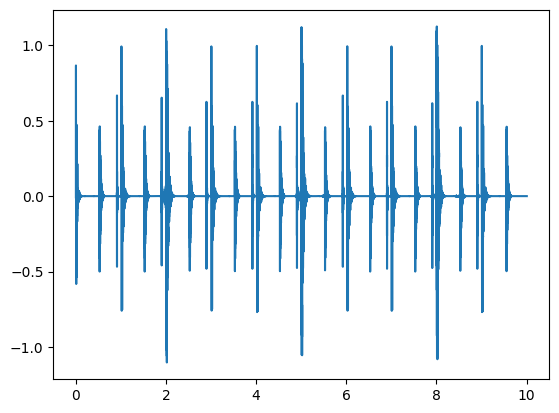

In [284]:
#قبل التعديل


path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)

#بنشيل الهارمونيك
audio = librosa.effects.percussive(audio)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)
sf.write('allmixed_without_harmonics.wav', audio, sample_rate, subtype='PCM_24')

In [285]:
path = 'pluc.wav'
pluc_window = 50
audio, sample_rate = librosa.load(path)
audio = librosa.effects.percussive(audio)

In [286]:
def fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=rfftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i]-window > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i] > fig_a[-1]:
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(216.0, 316.0),
 (457.0, 557.0),
 (1001.0, 1101.0),
 (1265.0, 1365.0),
 (1760.0, 1860.0),
 (2315.0, 2415.0),
 (2595.0, 2695.0),
 (2829.0, 2929.0),
 (3100.0, 3200.0),
 (3355.0, 3455.0),
 (3609.0, 3709.0),
 (3876.0, 3976.0),
 (4151.0, 4251.0),
 (4402.0, 4502.0),
 (4655.0, 4755.0),
 (4924.0, 5024.0),
 (5025.0, 5125.0),
 (5174.0, 5274.0),
 (5447.0, 5547.0),
 (5708.0, 5808.0),
 (5967.0, 6067.0),
 (6218.0, 6318.0),
 (6494.0, 6594.0),
 (6750.0, 6850.0),
 (6851.0, 6951.0),
 (7007.0, 7107.0),
 (7275.0, 7375.0),
 (7547.0, 7647.0),
 (7783.0, 7883.0),
 (8069.0, 8169.0),
 (8304.0, 8404.0),
 (8405.0, 8505.0),
 (8839.0, 8939.0),
 (9097.0, 9197.0),
 (9361.0, 9461.0),
 (9623.0, 9723.0),
 (9894.0, 9994.0),
 (10152.0, 10252.0)]

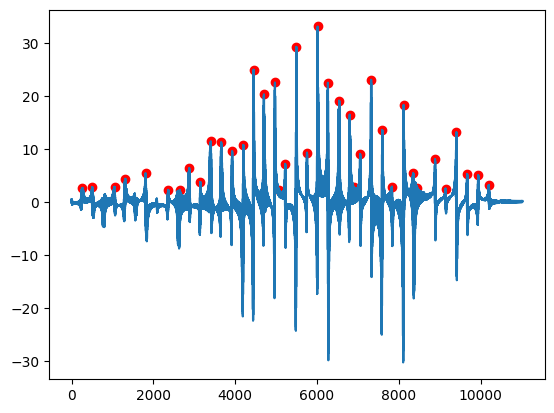

In [287]:
audio_fft, W = fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,pluc_window)
ranges

In [297]:
def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,window*2,len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-30*han/20) 
    plt.plot(W,cuttoff)
    return cuttoff

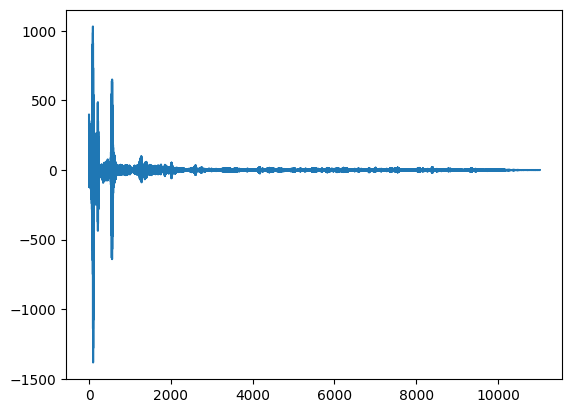

In [293]:
#الصوت لوحده
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))
audio_final = librosa.effects.percussive(audio_final)
Audio(audio_final, rate = sample_rate)

In [294]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)
audio = librosa.effects.percussive(audio)

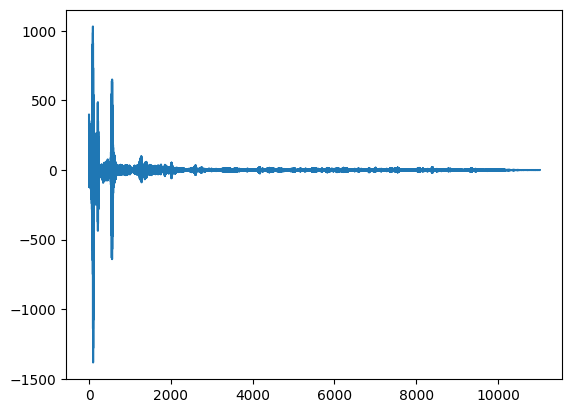

In [295]:
audio_fft, W = fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))
audio_final = librosa.effects.percussive(audio_final)
Audio(audio_final, rate = sample_rate)


In [281]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)
audio = librosa.effects.percussive(audio)
Audio(audio, rate = sample_rate)

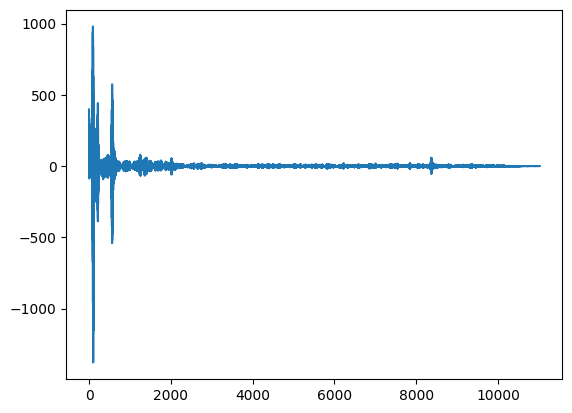

In [299]:
window=50
ranges=[(0.0, 100.0),
 (211.0, 311.0),
 (472.0, 572.0),
 (737.0, 837.0),
 (996.0, 1096.0),
 (1258.0, 1358.0),
 (1517.0, 1617.0),
 (1780.0, 1880.0),
 (2305.0, 2405.0),
 (2562.0, 2662.0),
 (2828.0, 2928.0),
 (3091.0, 3191.0),
 (3351.0, 3451.0),
 (3612.0, 3712.0),
 (3874.0, 3974.0),
 (4139.0, 4239.0),
 (4398.0, 4498.0),
 (4658.0, 4758.0),
 (4921.0, 5021.0),
 (5179.0, 5279.0),
 (5445.0, 5545.0),
 (5706.0, 5806.0),
 (5967.0, 6067.0),
 (6023.0, 6123.0),
 (6224.0, 6324.0),
 (6492.0, 6592.0),
 (6751.0, 6851.0),
 (7010.0, 7110.0),
 (7275.0, 7375.0),
 (7544.0, 7644.0),
 (8067.0, 8167.0),
 (8839.0, 8939.0),
 (9361.0, 9461.0),
 (9623.0, 9723.0),
 (9894.0, 9994.0),
 (10152.0,10252.0)]
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)
audio = librosa.effects.percussive(audio)
audio_fft, W = fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,pluc_window))
Audio(audio_final, rate = sample_rate)